In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd


Import data

In [2]:
df = pd.read_csv('/Users/tristan/Library/CloudStorage/OneDrive-StellenboschUniversity/Academics/Final_year/Semester 2/Skripsie/Data/RESAMPLED/df.csv')
df.set_index('Time')
df.drop('Time', axis=1, inplace=True)

Split the dataset?

In [3]:
X_train, X_test = train_test_split(df.drop(index = 1), test_size=0.3, random_state=42)
print(f'Train dataset:\n',X_train)
print(f'Test dataset: :\n', X_test)

Train dataset:
      NS_SQUID    F_SQUID   NS_Fluxgate  EW_Fluxgate    Z_Fluxgate
41  27.107560 -21.085760  10963.832880   -74.825520 -22673.215560
20  26.994320 -21.224000  10963.787180   -75.281100 -22673.204880
37  27.096160 -21.095000  10963.819960   -75.190300 -22673.265480
49  27.116233 -21.023567  10963.835767   -74.737083 -22673.098467
38  27.101680 -21.092040  10963.812300   -74.742560 -22673.269760
54  27.123500 -21.024660  10963.848760   -74.858420 -22673.221020
16  26.971683 -21.270400  10963.782783   -75.101217 -22673.275867
10  26.932480 -21.311400  10963.750100   -75.068520 -22673.414140
17  26.970700 -21.246580  10963.802080   -75.139360 -22673.354540
25  27.023840 -21.110160  10963.816540   -74.836500 -22673.239760
34  27.074083 -21.138767  10963.833700   -75.455150 -22673.232133
55  27.129160 -21.036660  10963.854580   -74.722660 -22673.298880
53  27.116220 -21.035600  10963.837440   -74.806080 -22673.291980
26  27.031280 -21.161180  10963.844640   -74.863860 -22673.2

Define Mahalanobis model

In [4]:
# Define the Elliptic Envelope
el = covariance.EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=0.0075, random_state=0)
# Fit the data - this is where FastMCD is used by sklearn
el.fit(df)
# Create column that shows anomaly status
df['Anomaly or Not'] = el.predict(df)
# Create scatterplot and color the anomalies differently
plt.figure(figsize = (9, 4))
ax = plt.scatter(df['Var 1'], d['Var 2'], c = df['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')
plt.grid()

NameError: name 'covariance' is not defined

Isolation Forest

In [4]:
# initialize and fit the model
clf = IsolationForest(contamination=0.1)
clf.fit(df)

IsolationForest(contamination=0.1)

Predict the anomalies in the data

In [5]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1]
[-1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1]


Visulization

InvalidIndexError: (array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True]), 0)

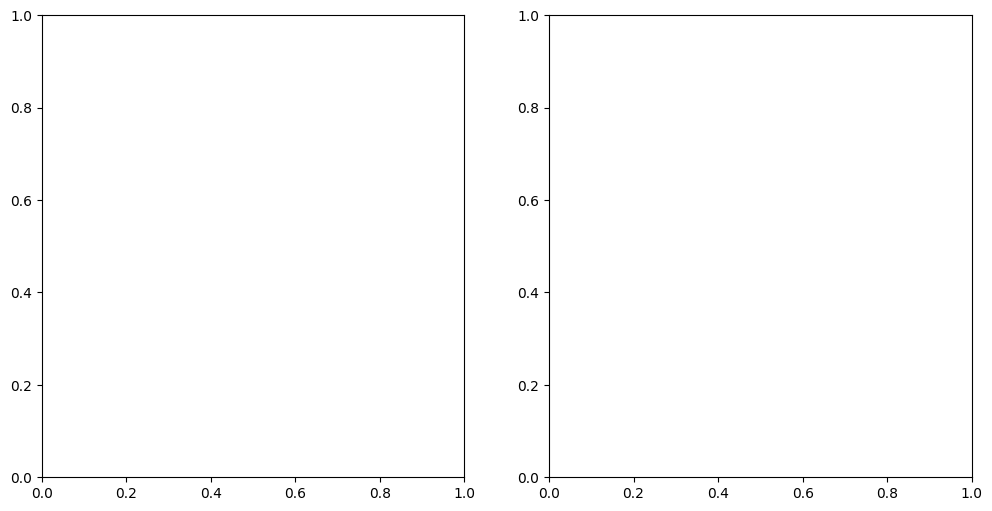

In [6]:
def create_scatter_plots(X1, y1, title1, X2, y2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Scatter plot for the first set of data
    axes[0].scatter(X1[y1==1, 0], X1[y1==1, 1], color='green', label='Normal')
    axes[0].scatter(X1[y1==-1, 0], X1[y1==-1, 1], color='red', label='Anomaly')
    axes[0].set_title(title1)
    axes[0].legend()

    # Scatter plot for the second set of data
    axes[1].scatter(X2[y2==1, 0], X2[y2==1, 1], color='green', label='Normal')
    axes[1].scatter(X2[y2==-1, 0], X2[y2==-1, 1], color='red', label='Anomaly')
    axes[1].set_title(title2)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# scatter plots
create_scatter_plots(X_train, y_pred_train, 'Training Data', X_test, y_pred_test, 'Test Data')